# PyMC Intro & Install

* 싸이그래머 / 베이지안 통계 (Python) : 파트4 [1]
* 김무성

# Contetns

0. 실습환경 설정
1. PyMC 설치
2. 실습 코드(& jupyter notebook) 설치
3. PyMC 소개

# 1. 실습환경 설정

* docker toolbox 설치
* docker 기반 jupyter(ipython notebook) 환경 셋팅

## docker toolbox 설치

* download - https://www.docker.com/toolbox

<img src="figures/cap0.png" width=600 />  

## docker 기반 jupyter(ipython notebook) 환경 셋팅

* jupyter/scipy-notebook
    - https://hub.docker.com/r/jupyter/scipy-notebook/
    - jupyter에서 빌드해서 내놓은 이미지가 여러개 있다. 
    - 그 중에 scipy-notebook을 써보자    

<img src="figures/cap0.1.png" width=600 />

<img src="figures/cap0.2.png" width=600 />

#### docker image pull

In [ ]:
docker pull jupyter/scipy-notebook

<img src="figures/cap0.3.png" width=600 />

#### docker container 실행

* 이때 이후에 여러 다른 파이썬 패키지를 설치해야 하므로 -e GRANT_SUDO=yes 옵션도 추가해서 실행

In [ ]:
docker run -d -e GRANT_SUDO=yes -p 8888:8888 jupyter/scipy-notebook

<img src="figures/cap0.4.png" width=600 />

#### jupyter 웹 UI 접속

* localhost:8888 혹은 docker toolbox에 매핑된 ip:8888로 브라우저에서 연다.

<img src="figures/cap1.png" width=600 />  

# 2. PyMC 설치

* jupyter 웹UI의 터미널 실행
* root로 유저 변환
    - python-qt4 설치
    - pymc 설치
        - python 3의 경우
            - conda를 이용해 설치    
        - python2의 경우
            - python2 activate
            - conda를 이용해 설치치치

## jupyter 웹UI의 터미널 실행

<img src="figures/cap2.png" width=600 />    

## root로 유저 변환

In [ ]:
sudo su -

<img src="figures/cap3.png" width=600 />    

### python-qt4 설치

* 현재 이미지는 matplotlib의 백엔드로 qt4를 쓰는데, 설치되어 있지 않다.
* 다음처럼, 전체 시스템에 설치하자

In [ ]:
apt-get install python-qt4

<img src="figures/cap17.png" width=600 />  

### pymc 설치

#### python 3의 경우

##### conda를 이용해 설치 

In [ ]:
conda install pymc

<img src="figures/cap4.png" width=600 />  

#### python2의 경우

##### python2 activate

In [ ]:
source activate python2

##### conda를 이용해 설치

<img src="figures/cap5.png" width=600 />  

##### 기본 설정으로 돌아오자(python3)

In [ ]:
source deactivate

<img src="figures/cap6.png" width=600 />  

##### root에서 일반사용자(jovyan)로 돌아옴

In [ ]:
exit

# 2. 실습 코드(& jupyter notebook) 설치

#### 터미널의 기본 경로에, 싸이그래머 베이지안 트랙 github 저장소를 바로 클로닝한다.

In [ ]:
git clone https://github.com/psygrammer/bayesianPy.git

<img src="figures/cap7.png" width=600 />  

#### jupyter UI를 통해 바로 접근

<img src="figures/cap8.png" width=600 /> 

#### 팁 : 웹 브라우저를 통해 바로 이미지도 노트북에 업로드 가능.

<img src="figures/cap9.png" width=600 />  

#### 팁 : 작업 후, github에 반영하기

* 터미널로 들어가서 git add, git commit, git push의 정통적인 단계를 거친다.

##### 그러나 최초 git 설정을 해줘야 한다.

* commit을 하려하면, git 사용자 정보를 셋팅해주라고 한다. 해주자.

<img src="figures/cap10.png" width=600 />  

In [ ]:
# 그냥 이 시스템에서(컨테이너에서) 쓸 것이다.
git config --global user.email "your@example.com"   # 본인 이메일
git config --global user.name "Your Nmae" # 본인 아이디

<img src="figures/cap11.png" width=600 />  

* 다시 커밋 시도. 성공한다.

<img src="figures/cap12.png" width=600 />  

In [ ]:
git push  # 자신의 깃헙 아이디와 비밀번호를 치면 (해당 저장소에 권한이 있다면) 성공한다.

<img src="figures/cap13.png" width=600 />  

# 3. PyMC 소개 [1]

* Purpose
* Features
* What’s new in version 2
* Usage
* History
* Relationship to other packages

## Purpose

* PyMC is a python module that implements Bayesian statistical models and fitting algorithms, including Markov chain Monte Carlo. Its flexibility and extensibility make it applicable to a large suite of problems. Along with core sampling functionality, PyMC includes methods for summarizing output, plotting, goodness-of-fit and convergence diagnostics.

## Features

* PyMC provides functionalities to make Bayesian analysis as painless as possible. Here is a short list of some of its features:
    - Fits Bayesian statistical models with Markov chain Monte Carlo and other algorithms.
    - Includes a large suite of well-documented statistical distributions.
    - Uses NumPy for numerics wherever possible.
    - Includes a module for modeling Gaussian processes.
    - Sampling loops can be paused and tuned manually, or saved and restarted later.
    - Creates summaries including tables and plots.
    - Traces can be saved to the disk as plain text, Python pickles, SQLite or MySQL database, or hdf5 archives.
    - Several convergence diagnostics are available.
    - Extensible: easily incorporates custom step methods and unusual probability distributions.
    - MCMC loops can be embedded in larger programs, and results can be analyzed with the full power of Python.

## What’s new in version 2

## Usage

In [1]:
!ls

figures  pymc_intro_install.ipynb


#### First, define your model in a file, say mymodel.py (with comments, of course!):

In [2]:
%%writefile mymodel.py

# Import relevant modules
import pymc
import numpy as np

# Some data
n = 5*np.ones(4,dtype=int)
x = np.array([-.86,-.3,-.05,.73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha',mu=0,tau=.01)
beta = pymc.Normal('beta',mu=0,tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a+b*x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0.,1.,3.,5.]),\
                  observed=True)


Writing mymodel.py


In [3]:
!ls

figures  mymodel.py  pymc_intro_install.ipynb


#### 팁 : 모델 시각화

* pymc로 만든 모델을 그래프로 만들 수 있다.
* 그러나 graphviz 기반으로 작동하는 pydot을 설치해야 한다.
* 현재 시스템에는 둘 다 없으므로 다음의 명령을 차례로.

#### 시스템 전체에 graphviz를 설치하자

In [ ]:
apt-get install graphviz

<img src="figures/cap19.png" width=600 />  

#### 그리고 conda를 이용해서 pydot 설치 (파이썬3는 아직 지원안함)

In [ ]:
conda install pydot

<img src="figures/cap18.png" width=600 />  

#### 그려보자

In [10]:
#Build a model out of these three variables
import pymc
import mymodel

model = pymc.Model(mymodel)

#Make a slightly pretty graph out of it
graph = pymc.graph.graph(model)
graph.write_png("graph.png")

True

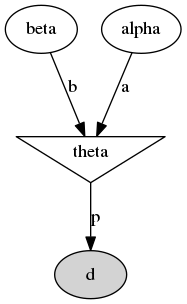

In [11]:
from IPython.display import Image
Image(filename='graph.png') 

### 만든 모델을 로딩하고, MCMC를 돌린 후에, 결과를 그래프로 확인해보자

#### notebook 안에서 그림이 나오도록 하려면 아래의 코드를 실행해야 한다. (pymc.Matplot 모듈을 쓰려해도) 

In [5]:
%matplotlib inline 

#### MCMC 실행 & 결과 그래프

 [-----------------100%-----------------] 10000 of 10000 complete in 0.9 secPlotting beta
Plotting alpha
Plotting theta_0
Plotting theta_1
Plotting theta_2
Plotting theta_3


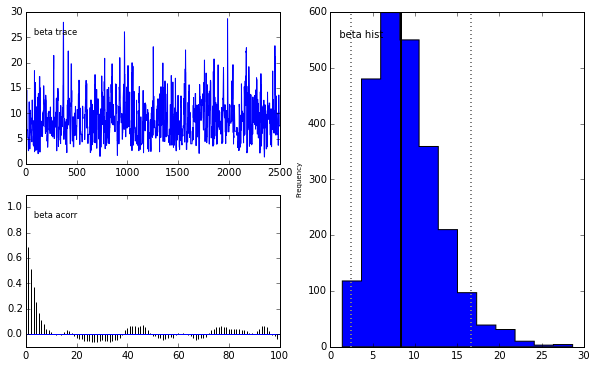

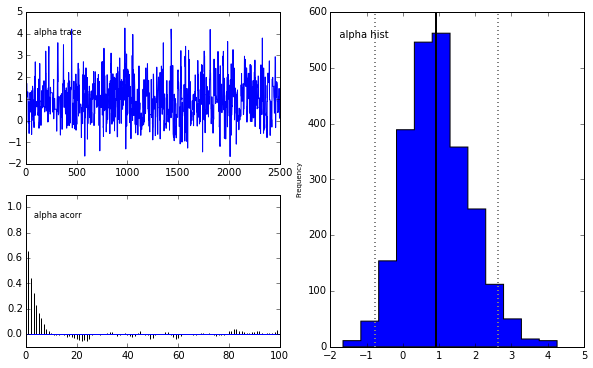

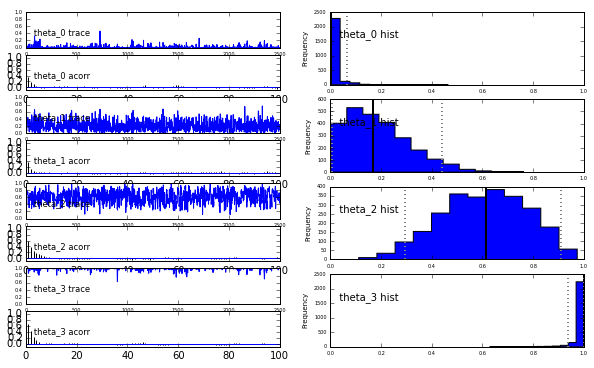

In [6]:
import pymc
import mymodel

S = pymc.MCMC(mymodel, db='pickle')
S.sample(iter=10000, burn=5000, thin=2)
pymc.Matplot.plot(S)

## History

## Relationship to other packages

# 참고자료

* [1] PyMC User’s Guide - https://pymc-devs.github.io/pymc/
* [2] 도커(Docker) 튜토리얼 : 깐 김에 배포까지 - http://blog.nacyot.com/articles/2014-01-27-easy-deploy-with-docker/
* [3] Docker란 무엇인가? : Docker 기본 사용법 - http://www.slideshare.net/pyrasis/docker-docker-38286477
* [4] ANNOUNCING DOCKER TOOLBOX - https://blog.docker.com/2015/08/docker-toolbox/